In [137]:
import pandas as pd
import numpy as np
import os

import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline

In [138]:
survey_df = pd.read_csv(r"C:\Users\Omen\Documents\python for Data Engineer\survey_results_public.csv")
survey_df


,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


In [139]:
survey_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [140]:
survey_schema_df = pd.read_csv(r"C:\Users\Omen\Documents\python for Data Engineer\survey_results_schema.csv")
survey_schema_df


,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,Age,What is your age (in years)? If you prefer not...
4,Age1stCode,At what age did you write your first line of c...
...,...,...
56,WebframeWorkedWith,Which web frameworks have you done extensive d...
57,WelcomeChange,"Compared to last year, how welcome do you feel..."
58,WorkWeekHrs,"On average, how many hours per week do you wor..."
59,YearsCode,"Including any education, how many years have y..."


In [141]:
schema_raw= pd.read_csv(r"C:\Users\Omen\Documents\python for Data Engineer\survey_results_schema.csv", index_col="Column").QuestionText
schema_raw

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

In [142]:
schema_raw["YearsCodePro"]

'NOT including education, how many years have you coded professionally (as a part of your work)?'

Data Preparation and Cleaning

In [143]:
survey_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [144]:
selected_columns=[
    "Country",
    "Age",
    "Gender",
    "EdLevel",
    "UndergradMajor",
    #Programing experience
    "Hobbyist",
    "Age1stCode",
    "YearsCode",
    "YearsCodePro",
    "LanguageWorkedWith",
    "LanguageDesireNextYear",
    "NEWLearn",
    "NEWStuck",
    #Employment
    "Employment",
    "DevType",
    "WorkWeekHrs",
    "JobSat",
    "JobFactors",
    "NEWOvertime",
    "NEWEdImpt"
]

In [145]:
len(selected_columns)

20

In [146]:
survey_copy_df=survey_df[selected_columns].copy()
survey_copy_df

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13,36,27,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19,7,4,JavaScript;Swift,Python;Swift,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN,Fairly important
2,Russian Federation,NaN,NaN,NaN,NaN,Yes,15,4,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,Once a decade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18,7,4,NaN,NaN,Once a year,NaN,NaN,NaN,40.0,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16,15,8,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,United States,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,16,10,Less than 1 year,NaN,NaN,Once a decade,Call a coworker or friend,Employed full-time,Senior executive/VP,NaN,NaN,NaN,NaN,Very important
64457,Morocco,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
64458,Viet Nam,NaN,NaN,Primary/elementary school,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,Poland,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,HTML/CSS,HTML/CSS;Java;JavaScript,Once a year,Call a coworker or friend;Visit Stack Overflow,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN


In [147]:
schema_copy =schema_raw[selected_columns]
schema_copy

Column
Country                                                  Where do you live?
Age                       What is your age (in years)? If you prefer not...
Gender                    Which of the following describe you, if any? P...
EdLevel                   Which of the following best describes the high...
UndergradMajor                        What was your primary field of study?
Hobbyist                                            Do you code as a hobby?
Age1stCode                At what age did you write your first line of c...
YearsCode                 Including any education, how many years have y...
YearsCodePro              NOT including education, how many years have y...
LanguageWorkedWith        Which programming, scripting, and markup langu...
LanguageDesireNextYear    Which programming, scripting, and markup langu...
NEWLearn                  How frequently do you learn a new language or ...
NEWStuck                  What do you do when you get stuck on a problem...
Emplo

In [148]:
survey_copy_df.shape

(64461, 20)

In [149]:
survey_copy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

In [150]:
schema_copy.Age1stCode

'At what age did you write your first line of code or program? (e.g., webpage, Hello World, Scratch project)'

In [151]:
survey_copy_df.Age1stCode.unique()

array(['13', '19', '15', '18', '16', '14', '12', '20', '42', '8', '25',
       '22', '30', '17', '21', '10', '46', '9', '7', '11', '6', nan, '31',
       '29', '5', 'Younger than 5 years', '28', '38', '23', '27', '41',
       '24', '53', '26', '35', '32', '40', '33', '36', '54', '48', '56',
       '45', '44', '34', 'Older than 85', '39', '51', '68', '50', '37',
       '47', '43', '52', '85', '64', '55', '58', '49', '76', '72', '73',
       '83', '63'], dtype=object)

In [152]:
survey_copy_df["Age1sfCode"]=pd.to_numeric(survey_copy_df.Age1stCode, errors="coerce")
survey_copy_df["YearsCOde"]=pd.to_numeric(survey_copy_df.YearsCode, errors="coerce")
survey_copy_df["YearsCodePro"]=pd.to_numeric(survey_copy_df.YearsCodePro, errors="coerce")


In [153]:
survey_copy_df.describe()

,Age,YearsCodePro,WorkWeekHrs,Age1sfCode,YearsCOde
count,45446.000000,44133.000000,41151.000000,57473.000000,56784.000000
mean,30.834111,8.869667,40.782174,15.476572,12.782051
std,9.585392,7.759961,17.816383,5.114081,9.490657
min,1.000000,1.000000,1.000000,5.000000,1.000000
25%,24.000000,3.000000,40.000000,12.000000,6.000000
50%,29.000000,6.000000,40.000000,15.000000,10.000000
75%,35.000000,12.000000,44.000000,18.000000,17.000000
max,279.000000,50.000000,475.000000,85.000000,50.000000


there seems to be a problem with the age column, as the min value is 1 and the max value is 279. So, we will drop rows that has age younger than 10 and older than 100.

In [154]:
survey_copy_df.drop(survey_copy_df[survey_copy_df.Age<10].index, inplace=True)
survey_copy_df.drop(survey_copy_df[survey_copy_df.Age>100].index, inplace=True) 

The same hold true for WorkWeekHrs. Let's ignore enteries where the value for the column is highr than 140 hours. (~20 hours per day)

In [155]:
survey_copy_df.drop(survey_copy_df[survey_copy_df.WorkWeekHrs>140].index, inplace=True)

In [156]:
survey_copy_df.Gender.value_counts()

Gender
Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: count, dtype: int64

In [157]:
survey_copy_df.where(~(survey_copy_df.Gender.str.contains(";", na=False)), np.nan, inplace=True)

In [158]:
survey_copy_df.Gender.value_counts()

Gender
Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: count, dtype: int64

In [159]:
survey_copy_df.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,...,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt,Age1sfCode,YearsCOde
58508,France,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,17,6,NaN,NaN,...,NaN,Student,NaN,NaN,NaN,NaN,NaN,NaN,17.0,6.0
49606,Singapore,34.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","A business discipline (such as accounting, fin...",Yes,24,5,5.0,HTML/CSS;Java;JavaScript;TypeScript,...,Call a coworker or friend;Visit Stack Overflow,Employed full-time,"Developer, full-stack",50.0,Very satisfied,"Languages, frameworks, and other technologies ...",Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary,24.0,5.0
14405,China,26.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,NaN,NaN,NaN,Python,...,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,NaN,NaN,NaN,Specific department or team I’d be working on,NaN,Critically important,NaN,NaN
56704,India,24.0,NaN,NaN,"Computer science, computer engineering, or sof...",Yes,18,6,1.0,C;C#;C++;HTML/CSS;JavaScript;PHP;SQL,...,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Database administrator;Designer;Developer, bac...",40.0,Very satisfied,"Languages, frameworks, and other technologies ...",Never,Very important,18.0,6.0
14928,Netherlands,49.0,Man,"Other doctoral degree (Ph.D., Ed.D., etc.)","Computer science, computer engineering, or sof...",Yes,12,36,23.0,C;Haskell;Java;PHP;SQL,...,Play games;Visit Stack Overflow,Employed full-time,"Academic researcher;Designer;Developer, back-e...",32.0,Very satisfied,How widely used or impactful my work output wo...,Often: 1-2 days per week or more,Critically important,12.0,36.0
40659,Italy,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,...,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58411,United Kingdom,27.0,Woman,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","A social science (such as anthropology, psycho...",Yes,11,5,4.0,Go;Java;Python;SQL,...,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Engineer, data",40.0,Very satisfied,"Languages, frameworks, and other technologies ...",Sometimes: 1-2 days per month but less than we...,Fairly important,11.0,5.0
47809,India,28.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,21,5,4.0,JavaScript;PHP;SQL;TypeScript,...,Play games;Visit Stack Overflow;Watch help / t...,Employed full-time,Academic researcher;Data or business analyst;D...,45.0,Neither satisfied nor dissatisfied,Flex time or a flexible schedule;Financial per...,Rarely: 1-2 days per year or less,Critically important,21.0,5.0
48230,United Kingdom,28.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,11,11,5.0,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;S...,...,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, full-stack",40.0,Very satisfied,"Flex time or a flexible schedule;Languages, fr...",Never,Somewhat important,11.0,11.0
11182,Poland,27.0,Man,Some college/university study without earning ...,"A humanities discipline (such as literature, h...",No,22,5,3.0,C#;Python;SQL,...,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Data or business analyst;Developer, back-end;D...",40.0,Very satisfied,"Languages, frameworks, and other technologies ...",Sometimes: 1-2 days per month but less than we...,Not at all important/not necessary,22.0,5.0


Exploratory Analysis and Visualization

In [160]:
sns.set_style("darkgrid")
matplotlib.rcParams["font.size"]=14
matplotlib.rcParams["figure.figsize"]=(9,5)
matplotlib.rcParams["figure.facecolor"]="#00000000"

Country

In [161]:
schema_copy.Country

'Where do you live?'

In [162]:
survey_copy_df.Country.unique()

array(['Germany', 'United Kingdom', 'Russian Federation', 'Albania',
       'United States', 'India', 'Tunisia', 'Spain', 'Netherlands',
       'France', 'Belgium', 'Portugal', 'Canada', 'China', 'Ukraine',
       'Italy', 'Brazil', 'Austria', 'Mexico', 'Sweden', 'Poland',
       'Indonesia', 'Greece', 'Israel', 'Czech Republic', nan,
       'Bosnia and Herzegovina', 'Bulgaria', 'Serbia', 'Switzerland',
       'Hungary', 'Nepal', 'Slovenia', 'Uruguay', 'Denmark', 'Pakistan',
       'Taiwan', 'Romania', 'Finland', 'Costa Rica', 'Nigeria', 'Chile',
       'Turkey', 'Panama', 'Ireland', 'Estonia', 'Philippines',
       'Australia', 'Nomadic', 'Peru', 'Cyprus', 'Sri Lanka', 'Kenya',
       'Norway', 'Iran', 'Croatia', 'Egypt', 'Argentina', 'Ghana',
       'Latvia', 'Morocco', 'Bangladesh', 'Ecuador', 'Haiti',
       'Venezuela, Bolivarian Republic of...', 'Colombia', 'Lithuania',
       'El Salvador', 'Honduras', 'Ethiopia', 'Lebanon', 'Uganda',
       'Algeria', 'Viet Nam', 'Guatemala', '

In [163]:
top_countries=survey_copy_df.Country.value_counts().head(15)
top_countries

Country
United States         12371
India                  8364
United Kingdom         3881
Germany                3864
Canada                 2175
France                 1884
Brazil                 1804
Netherlands            1332
Poland                 1259
Australia              1199
Spain                  1157
Italy                  1115
Russian Federation     1085
Sweden                  879
Pakistan                802
Name: count, dtype: int64

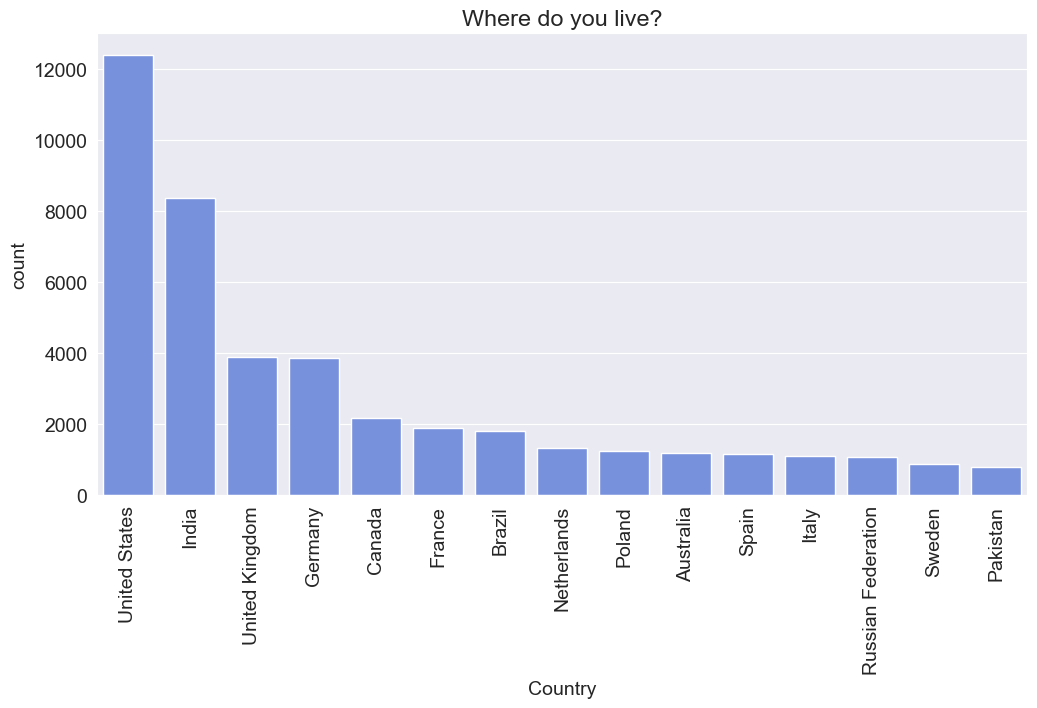

In [164]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=90)
plt.title(schema_copy.Country)
sns.barplot(x=top_countries.index, y=top_countries);

Age

(array([2.0900e+02, 2.4190e+03, 9.1350e+03, 1.1938e+04, 8.7390e+03,
        5.5820e+03, 3.0310e+03, 1.7560e+03, 1.0380e+03, 6.2200e+02,
        3.3300e+02, 1.4300e+02, 7.1000e+01, 2.4000e+01, 9.0000e+00,
        6.0000e+00, 3.0000e+00]),
 array([10., 15., 20., 25., 30., 35., 40., 45., 50., 55., 60., 65., 70.,
        75., 80., 85., 90., 95.]),
 <BarContainer object of 17 artists>)

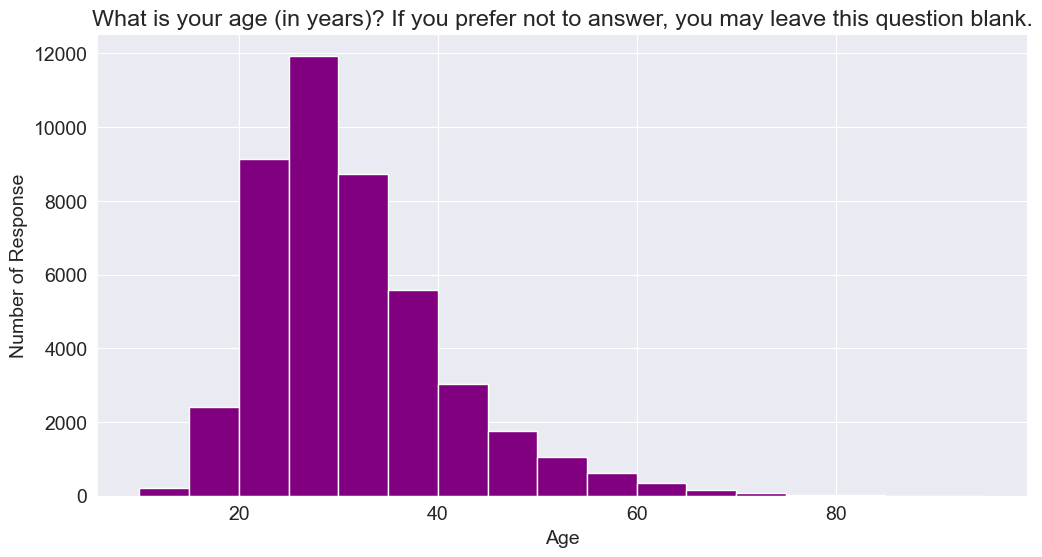

In [165]:
plt.figure(figsize=(12, 6))
plt.title(schema_copy.Age)
plt.xlabel("Age")
plt.ylabel("Number of Response")
plt.hist(survey_copy_df.Age, bins=np.arange(10, 100, 5), color="purple")

Gender

In [166]:
schema_copy.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [167]:
gender_counts = survey_copy_df.Gender.value_counts()
gender_counts

Gender
Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: count, dtype: int64

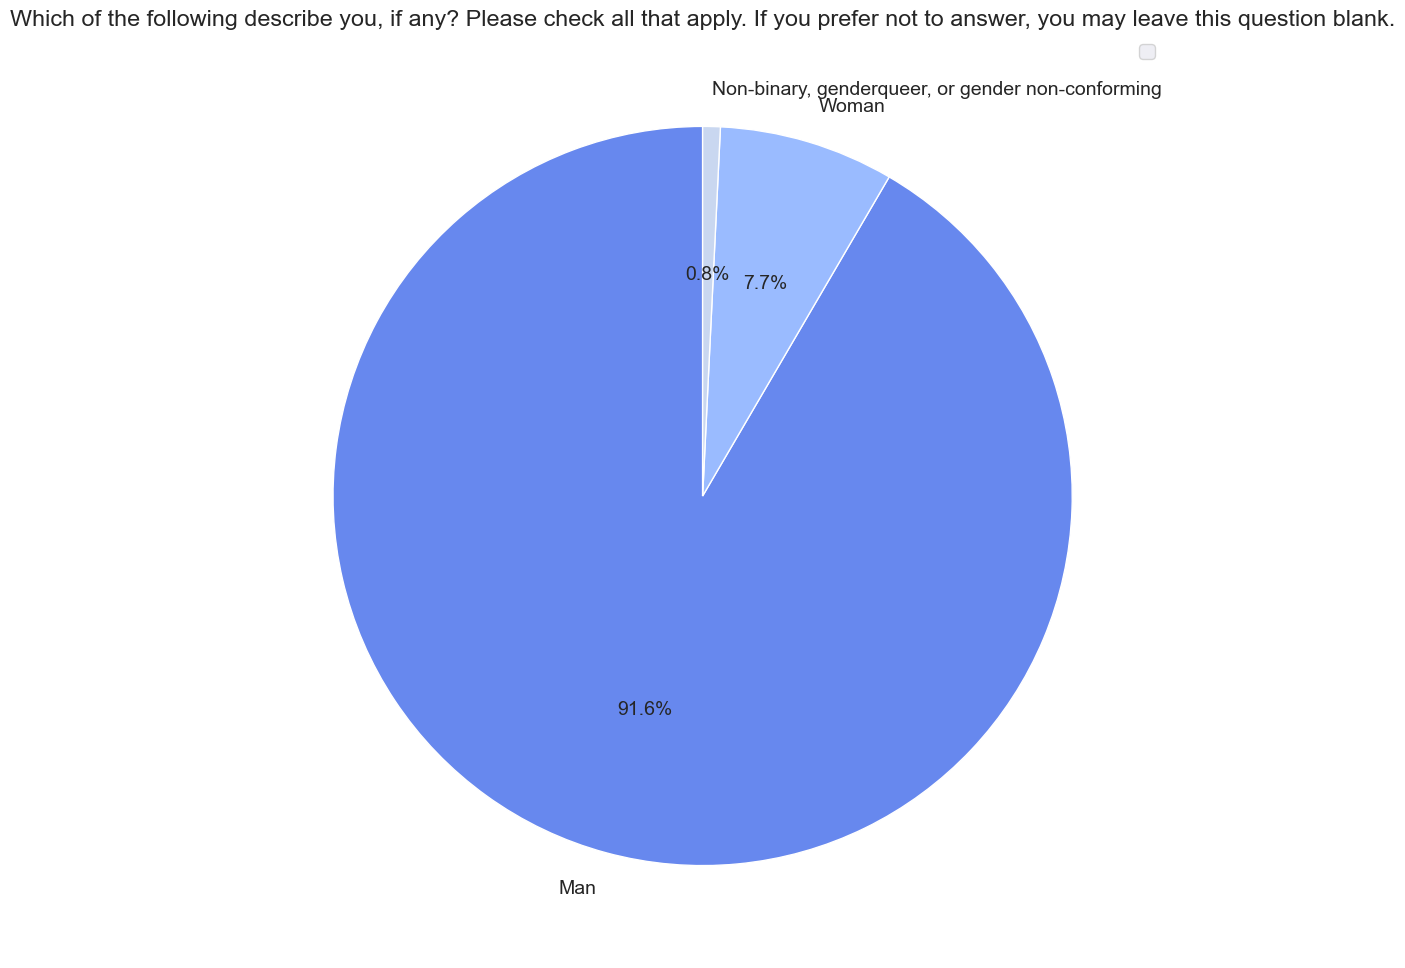

In [168]:
plt.figure(figsize=(15, 12))
plt.title(schema_copy.Gender)
plt.legend(["Man", "Woman", "NonBinary"])
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%", startangle=90);

Education Level

Text(0, 0.5, '')

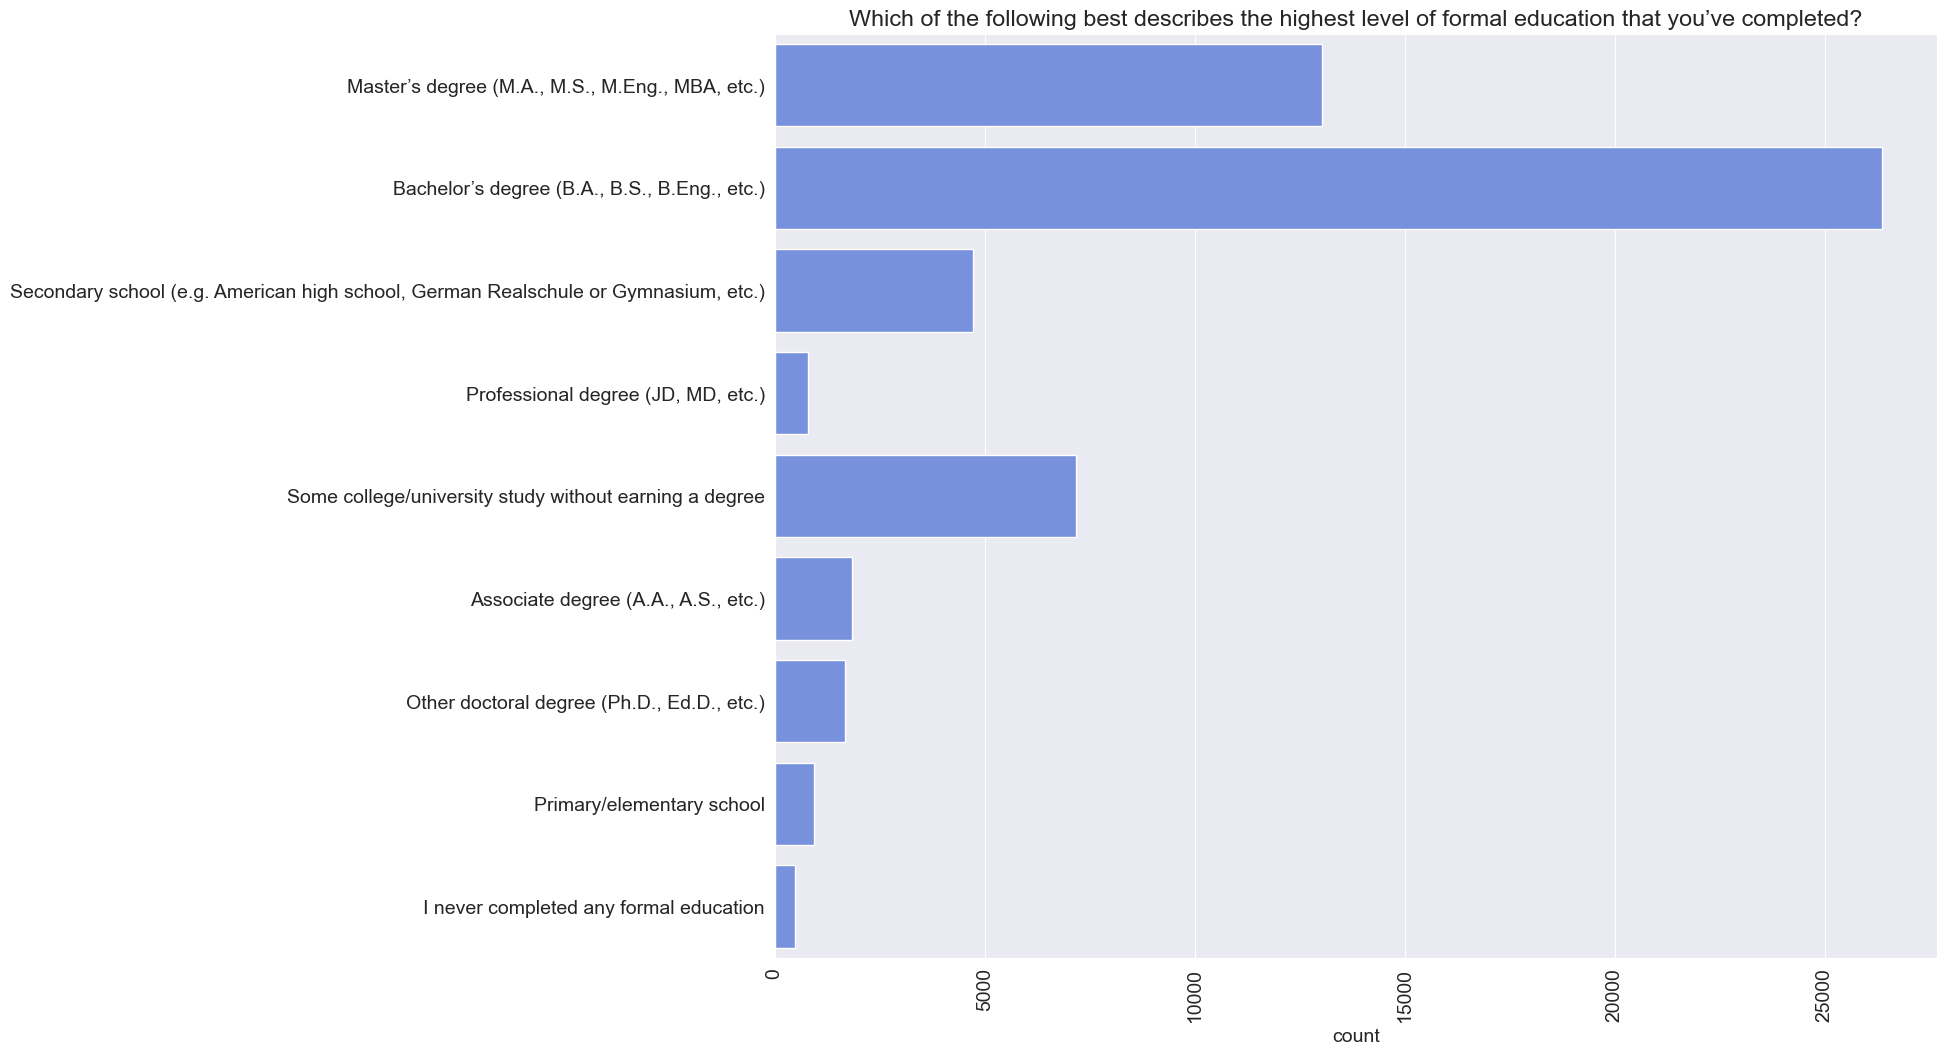

In [169]:
plt.figure(figsize=(15, 12))
sns.countplot(y=survey_copy_df.EdLevel)

sns.set_palette("coolwarm")
plt.xticks(rotation=90)
plt.title(schema_copy["EdLevel"])
plt.ylabel(None)

Plotting undergraduate majors, by converting the number into percentage, then sorting by percentage values to make it easier to visualize the data.

In [170]:
schema_copy.UndergradMajor

'What was your primary field of study?'

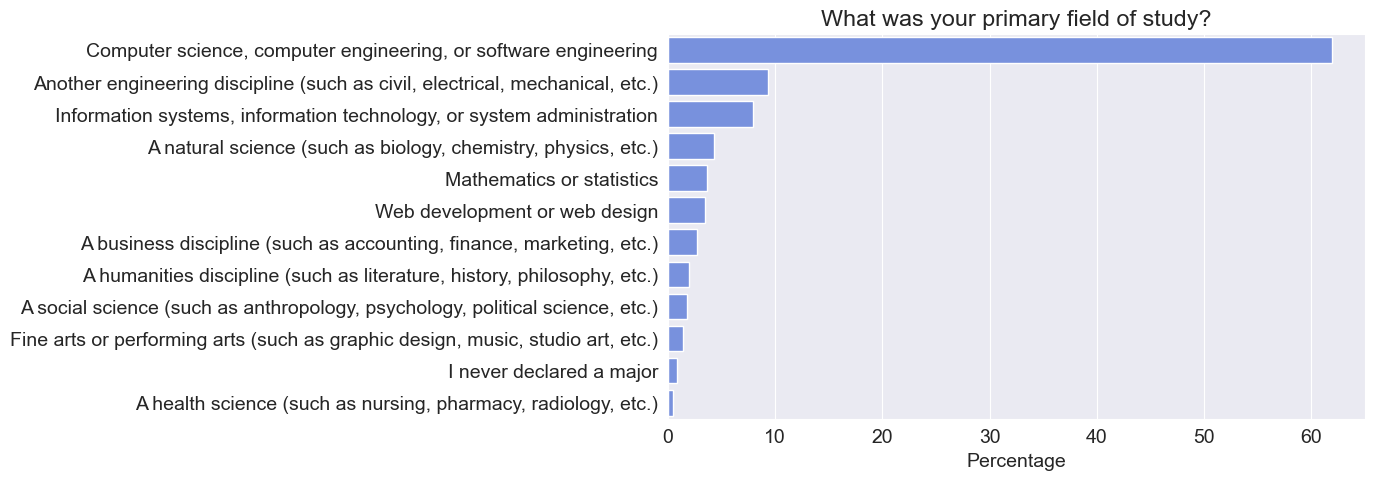

In [171]:
undergrad_pct= survey_copy_df.UndergradMajor.value_counts()*100/survey_copy_df.UndergradMajor.count();
sns.barplot(x=undergrad_pct, y=undergrad_pct.index)


plt.title(schema_copy.UndergradMajor)
plt.ylabel(None)
plt.xlabel("Percentage");

Employment

In [172]:
schema_copy.Employment

'Which of the following best describes your current employment status?'

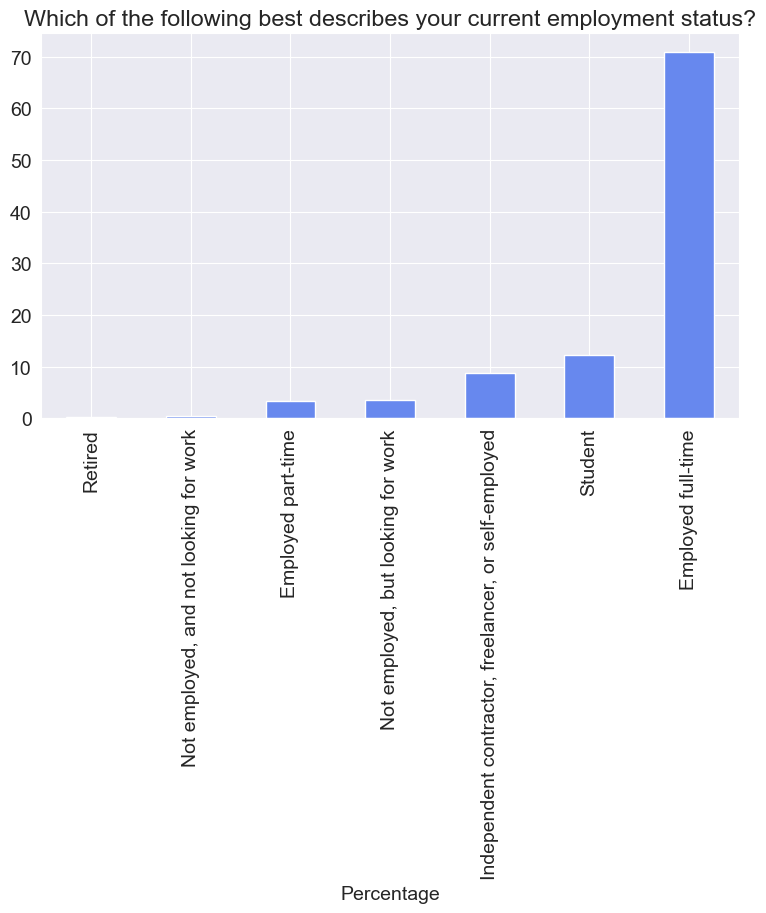

In [173]:
(survey_copy_df.Employment.value_counts(normalize=True, ascending=True)*100).plot(kind= "bar")
plt.title(schema_copy.Employment)
plt.xlabel("Percentage");

In [174]:
schema_copy.DevType

'Which of the following describe you? Please select all that apply.'

In [175]:
survey_copy_df.DevType.value_counts()

DevType
Developer, full-stack                                                                                                                                                           4396
Developer, back-end                                                                                                                                                             3056
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                  2214
Developer, back-end;Developer, full-stack                                                                                                                                       1465
Developer, front-end                                                                                                                                                            1390
                                                                                       

In [176]:
def split_multicolumn(col_series):
    result_df=col_series.to_frame()
    options=[]
    for idx, value in col_series[col_series.notnull()].items():
        for option in value.split(";"):
            if not option in result_df.columns:
                options.append(option)
                result_df[option]=False
            result_df.at[idx, option]=True
    return result_df[options]


In [177]:
dev_type_df=split_multicolumn(survey_copy_df.DevType)
dev_type_df

,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,...,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
64457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [178]:
dev_type_total = dev_type_df.sum().sort_values(ascending=False)
dev_type_total

Developer, back-end                              26996
Developer, full-stack                            26915
Developer, front-end                             18128
Developer, desktop or enterprise applications    11687
Developer, mobile                                 9406
DevOps specialist                                 5915
Database administrator                            5658
Designer                                          5262
System administrator                              5185
Developer, embedded applications or devices       4701
Data or business analyst                          3970
Data scientist or machine learning specialist     3939
Developer, QA or test                             3893
Engineer, data                                    3700
Academic researcher                               3502
Educator                                          2895
Developer, game or graphics                       2751
Engineering manager                               2699
Product ma

Q: which were the most popular language programming languages in 2020

In [179]:
survey_copy_df.LanguageWorkedWith

0                                   C#;HTML/CSS;JavaScript
1                                         JavaScript;Swift
2                                 Objective-C;Python;Swift
3                                                      NaN
4                                        HTML/CSS;Ruby;SQL
                               ...                        
64456                                                  NaN
64457    Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...
64458                                                  NaN
64459                                             HTML/CSS
64460                      C#;HTML/CSS;Java;JavaScript;SQL
Name: LanguageWorkedWith, Length: 64306, dtype: object

In [180]:
languages_worked_df=split_multicolumn(survey_copy_df.LanguageWorkedWith)
languages_worked_df

,C#,HTML/CSS,JavaScript,Swift,Objective-C,Python,Ruby,SQL,Java,PHP,...,VBA,Perl,Scala,C++,Go,Haskell,Rust,Dart,Julia,Assembly
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [181]:
languages_worked_df.sum().sort_values(ascending=False)

JavaScript               38515
HTML/CSS                 35884
SQL                      31153
Python                   25080
Java                     22905
Bash/Shell/PowerShell    18803
C#                       17879
PHP                      14874
TypeScript               14444
C++                      13578
C                        12370
Go                        4989
Kotlin                    4429
Ruby                      4006
Assembly                  3503
VBA                       3469
Swift                     3361
R                         3257
Rust                      2893
Objective-C               2317
Dart                      2262
Scala                     2026
Perl                      1773
Haskell                   1197
Julia                      503
dtype: int64

In [182]:
languages_worked_percentages= languages_worked_df.mean().sort_values(ascending=False)*100
languages_worked_percentages

JavaScript               59.893323
HTML/CSS                 55.801947
SQL                      48.444935
Python                   39.001026
Java                     35.618760
Bash/Shell/PowerShell    29.239884
C#                       27.803004
PHP                      23.130035
TypeScript               22.461357
C++                      21.114670
C                        19.236152
Go                        7.758219
Kotlin                    6.887382
Ruby                      6.229590
Assembly                  5.447392
VBA                       5.394520
Swift                     5.226573
R                         5.064846
Rust                      4.498803
Objective-C               3.603085
Dart                      3.517557
Scala                     3.150561
Perl                      2.757130
Haskell                   1.861413
Julia                     0.782198
dtype: float64

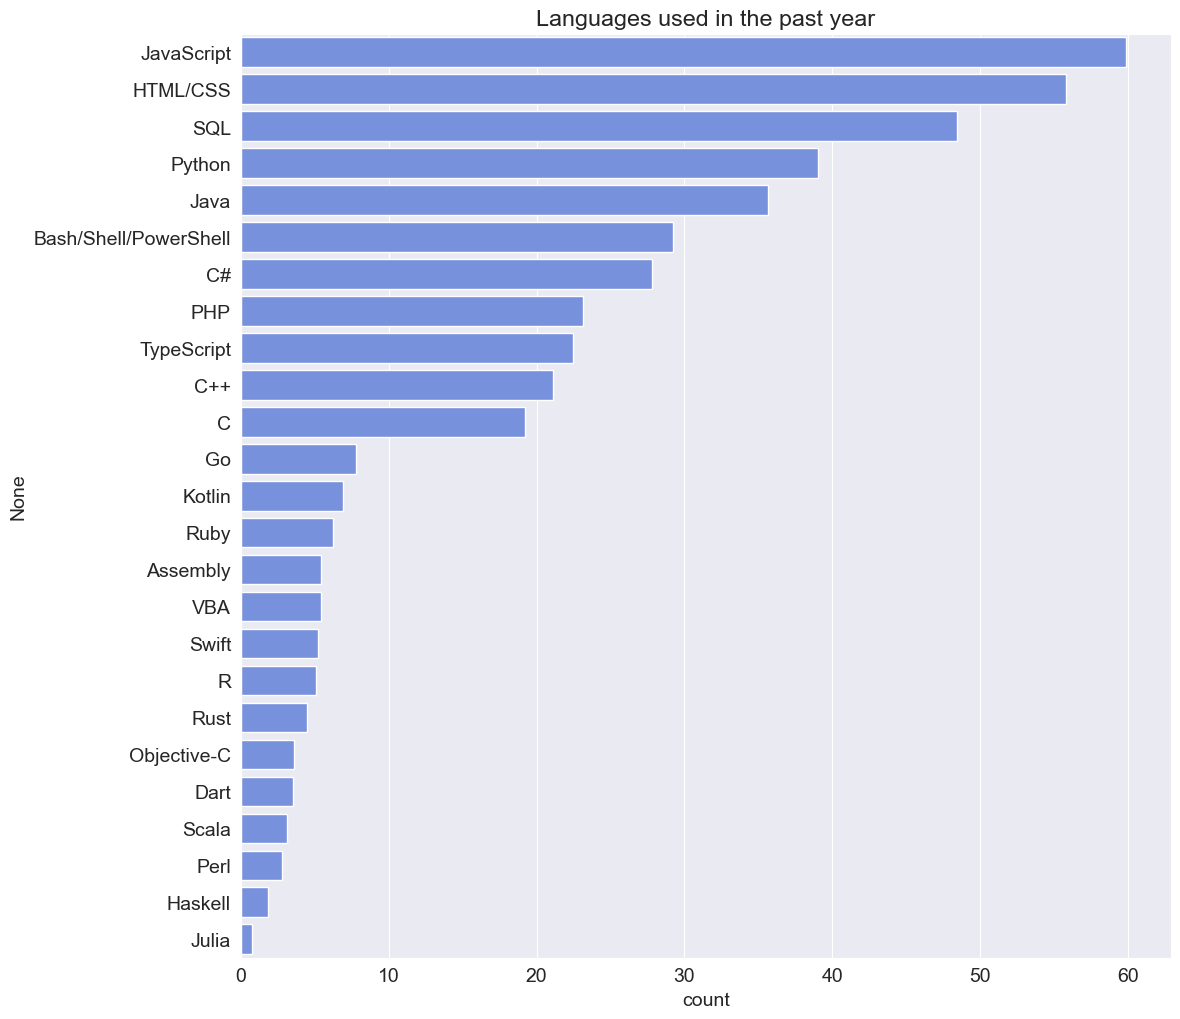

In [183]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_worked_percentages, y=languages_worked_percentages.index)
plt.title("Languages used in the past year");
plt.xlabel("count");

Q: which langauges are the most people interrested to learn over the next year?

In [184]:
languages_interested_df=split_multicolumn(survey_copy_df.LanguageDesireNextYear)
language_interested_percentages=languages_interested_df.mean().sort_values(ascending=False)*100
language_interested_percentages

Python                   41.143906
JavaScript               40.425466
HTML/CSS                 32.028116
SQL                      30.799614
TypeScript               26.451653
C#                       21.058688
Java                     20.464653
Go                       19.432090
Bash/Shell/PowerShell    18.057413
Rust                     16.270643
C++                      15.014151
Kotlin                   14.760676
PHP                      10.947657
C                         9.359935
Swift                     8.692812
Dart                      7.308805
R                         6.571704
Ruby                      6.425528
Scala                     5.326097
Haskell                   4.593662
Assembly                  3.766367
Julia                     2.540976
Objective-C               2.338818
Perl                      1.761888
VBA                       1.611047
dtype: float64

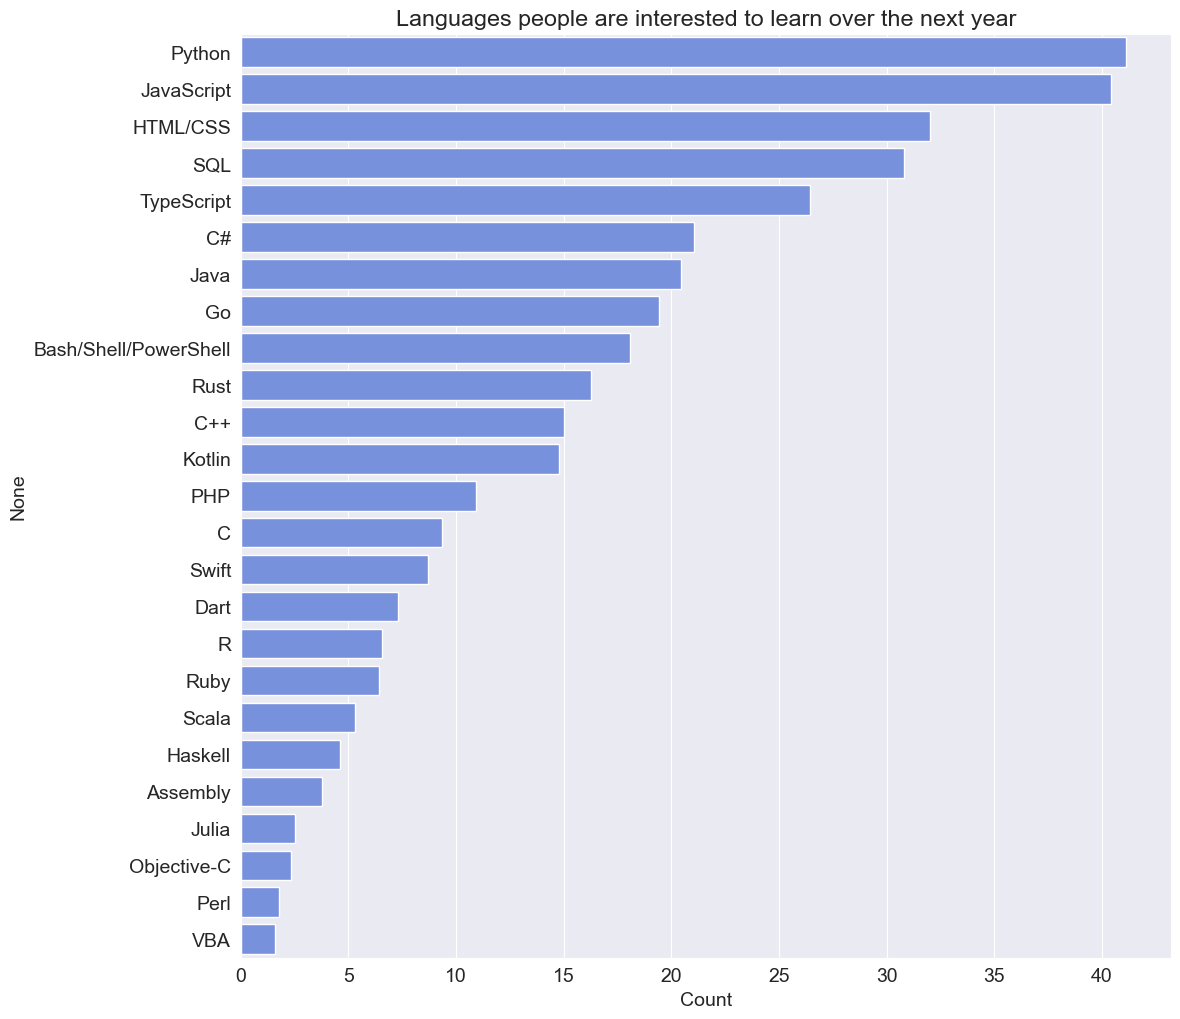

In [185]:
plt.figure(figsize=(12, 12))
sns.barplot(x=language_interested_percentages, y=language_interested_percentages.index)
plt.title("Languages people are interested to learn over the next year")
plt.xlabel("Count");

    Which are the most loved languages i.e. a high percentage of people who have used the language want to continue learning and using it over the next year?

In [186]:
languages_loved_df= languages_worked_df& languages_interested_df
languages_loved_percentages= (languages_loved_df.sum()*100/languages_worked_df.sum()).sort_values(ascending=False)
languages_loved_percentages

Rust                     86.069824
TypeScript               67.114373
Python                   66.598884
Kotlin                   62.813276
Go                       62.176789
Dart                     62.068966
Julia                    61.431412
C#                       59.623021
Swift                    59.476346
JavaScript               58.353888
SQL                      56.607710
Bash/Shell/PowerShell    53.688241
HTML/CSS                 53.494594
Scala                    53.257651
Haskell                  51.378446
R                        44.427387
Java                     44.108273
C++                      43.415820
Ruby                     42.735896
PHP                      37.232755
C                        32.983023
Assembly                 29.089352
Perl                     28.369994
Objective-C              23.133362
VBA                      19.458057
dtype: float64

C:\Users\Omen\AppData\Local\Temp\ipykernel_1484\1236845095.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=languages_loved_percentages, y=languages_loved_percentages.index,  palette=colors)


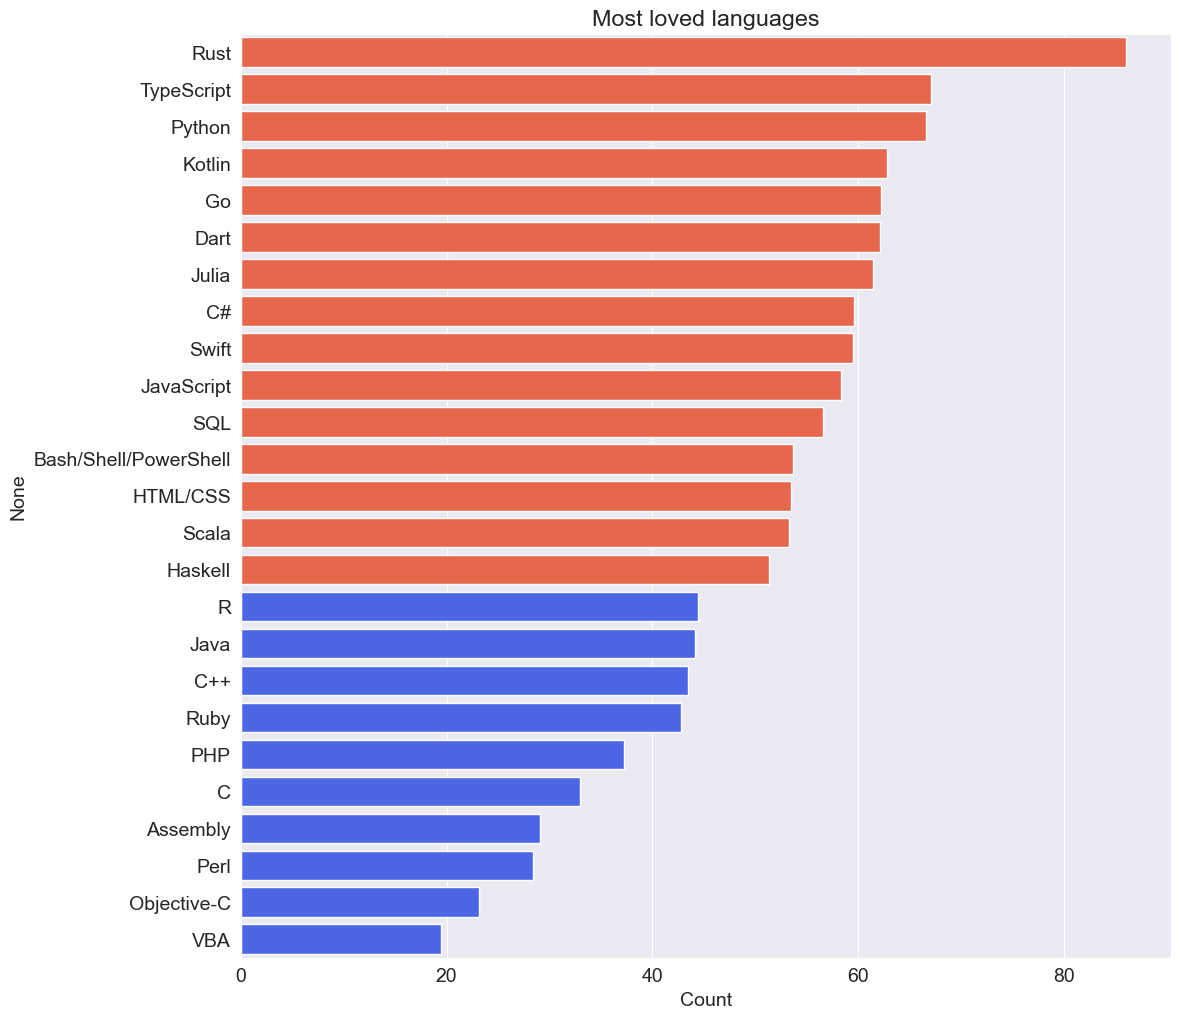

In [187]:
colors = ['#FF5733' if value > 50 else '#3357FF' for value in languages_loved_percentages]
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_loved_percentages, y=languages_loved_percentages.index,  palette=colors)
plt.title("Most loved languages")
plt.xlabel("Count");

Q: in which countries do developers work the highest number of hours per week? Consider countries with more than 250 responses only.

In [188]:
countries_df = survey_copy_df.groupby("Country")[["WorkWeekHrs"]].mean().sort_values("WorkWeekHrs", ascending=False)
countries_df


,WorkWeekHrs
Country,
Kuwait,58.222222
Iraq,52.153846
Grenada,50.000000
Maldives,47.300000
Afghanistan,46.500000
...,...
North Korea,NaN
Saint Lucia,NaN
Sierra Leone,NaN


In [189]:
high_response_countries_df=countries_df.loc[survey_copy_df.Country.value_counts()>250].head(15)
high_response_countries_df

,WorkWeekHrs
Country,
Iran,44.337748
Israel,43.915094
China,42.150000
United States,41.802982
Greece,41.402724
Viet Nam,41.391667
South Africa,41.023460
Turkey,40.982143
Sri Lanka,40.612245


Q: how important is to start young to build a career in programming?

In [190]:
schema_copy.YearsCodePro

'NOT including education, how many years have you coded professionally (as a part of your work)?'

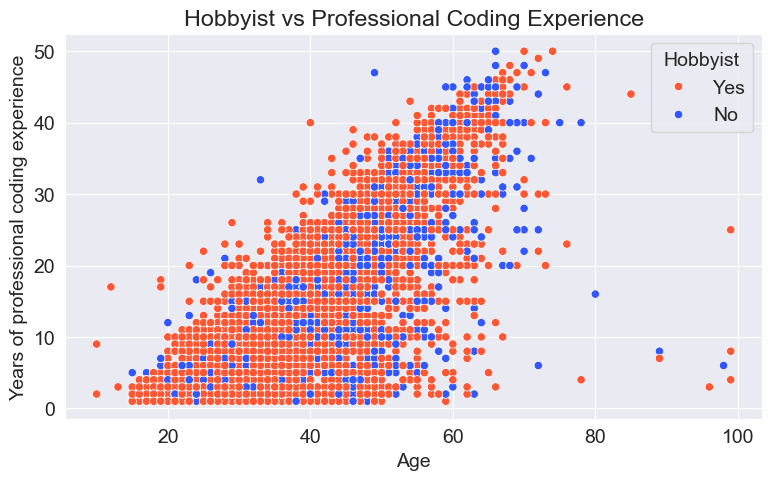

In [191]:
custom_palette={"Yes": "#FF5733", "No": "#3357FF"}
sns.scatterplot(x="Age", y="YearsCodePro", hue="Hobbyist", data=survey_copy_df, palette=custom_palette)
plt.xlabel("Age")
plt.ylabel("Years of professional coding experience");
plt.title("Hobbyist vs Professional Coding Experience")
plt.show();

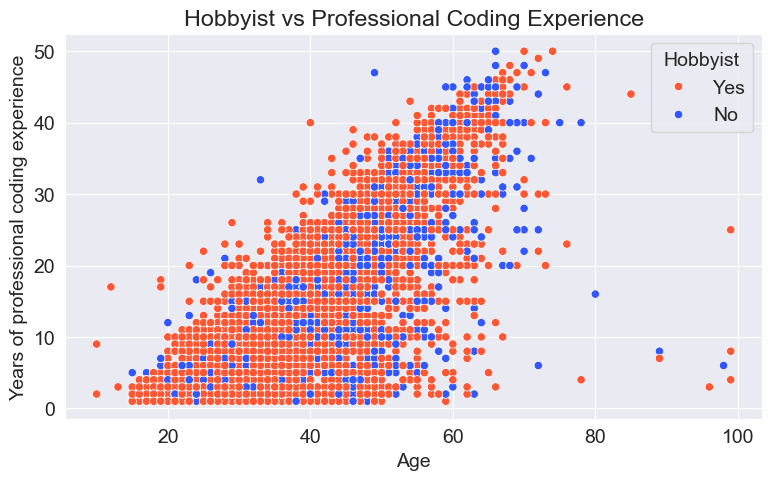

In [192]:
custom_palette={"Yes": "#FF5733", "No": "#3357FF"}
sns.scatterplot(x="Age", y="YearsCodePro", hue="Hobbyist", data=survey_copy_df, palette=custom_palette)
plt.xlabel("Age")
plt.ylabel("Years of professional coding experience");
plt.title("Hobbyist vs Professional Coding Experience")
plt.show();